In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from pandas import get_dummies
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [139]:
df=pd.read_csv('indian_liver_patient.csv')

# Create dummy or indicator features for categorical variables
df_dummies = pd.get_dummies(df, columns=['Gender'], drop_first=True)
#dropping target column
df_dummies = df_dummies.drop(columns=['Dataset'])


# Check the new DataFrame with dummy variables
print(df_dummies.head())


   Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  Albumin  Albumin_and_Globulin_Ratio  Gender_Male
0   65            0.700             0.100                   187                        16                          18           6.800    3.300                       0.900        False
1   62           10.900             5.500                   699                        64                         100           7.500    3.200                       0.740         True
2   62            7.300             4.100                   490                        60                          68           7.000    3.300                       0.890         True
3   58            1.000             0.400                   182                        14                          20           6.800    3.400                       1.000         True
4   72            3.900             2.000                   195                 

In [140]:
df_dummies

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
0,65,0.700,0.100,187,16,18,6.800,3.300,0.900,False
1,62,10.900,5.500,699,64,100,7.500,3.200,0.740,True
2,62,7.300,4.100,490,60,68,7.000,3.300,0.890,True
3,58,1.000,0.400,182,14,20,6.800,3.400,1.000,True
4,72,3.900,2.000,195,27,59,7.300,2.400,0.400,True
...,...,...,...,...,...,...,...,...,...,...
578,60,0.500,0.100,500,20,34,5.900,1.600,0.370,True
579,40,0.600,0.100,98,35,31,6.000,3.200,1.100,True
580,52,0.800,0.200,245,48,49,6.400,3.200,1.000,True
581,31,1.300,0.500,184,29,32,6.800,3.400,1.000,True


In [141]:
# Select numeric columns for scaling
numeric_cols = df_dummies.select_dtypes(include=['float64', 'int64']).columns

# Initialize the MinMaxScaler to scale features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the numeric columns to scale them between 0 and 1
df_dummies[numeric_cols] = scaler.fit_transform(df_dummies[numeric_cols])

# Check the first few rows of the transformed data
print(df_dummies.head())

    Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  Albumin  Albumin_and_Globulin_Ratio  Gender_Male
0 0.709            0.004             0.000                 0.061                     0.003                       0.002           0.594    0.522                       0.240        False
1 0.674            0.141             0.276                 0.311                     0.027                       0.018           0.696    0.500                       0.176         True
2 0.674            0.092             0.204                 0.209                     0.025                       0.012           0.623    0.522                       0.236         True
3 0.628            0.008             0.015                 0.058                     0.002                       0.002           0.594    0.543                       0.280         True
4 0.791            0.047             0.097                 0.064           

In [142]:
#Split your data into testing and training datasets
from sklearn.model_selection import train_test_split

#  target variable is 'Dataset' and the rest are features
X = df_dummies 
y = df['Dataset'] 

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f'Training set features shape: {X_train.shape}')
print(f'Testing set features shape: {X_test.shape}')

Training set features shape: (466, 10)
Testing set features shape: (117, 10)


In [143]:
X_train

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
77,0.744,0.003,0.000,0.761,0.043,0.024,0.275,0.261,0.200,False
581,0.314,0.012,0.020,0.059,0.010,0.004,0.594,0.543,0.280,True
210,0.279,0.005,0.010,0.062,0.005,0.001,0.203,0.326,0.440,True
192,0.651,0.025,0.026,0.102,0.035,0.008,0.565,0.565,0.320,True
449,0.512,0.007,0.005,0.054,0.008,0.003,0.507,0.478,0.280,False
...,...,...,...,...,...,...,...,...,...,...
71,0.826,0.005,0.005,0.061,0.005,0.004,0.246,0.196,0.120,False
106,0.372,0.066,0.112,0.040,0.011,0.017,0.348,0.370,0.280,True
270,0.384,0.004,0.005,0.084,0.043,0.009,0.986,0.870,0.280,True
435,0.151,0.001,0.000,0.070,0.009,0.002,0.638,0.783,0.560,False


In [144]:
y_train

77     1
581    1
210    1
192    1
449    1
      ..
71     1
106    2
270    1
435    2
102    1
Name: Dataset, Length: 466, dtype: int64

In [145]:
cat_cols = []
num_cols = []

for col in df.columns:
  if type(df[col][0]) == str:
    cat_cols.append(col)
  else:
    num_cols.append(col)

# Drop rows with NaN values from both X and y
X_train, y_train = X_train.dropna(), y_train[X_train.dropna().index]
X_test, y_test = X_test.dropna(), y_test[X_test.dropna().index]

<Axes: >

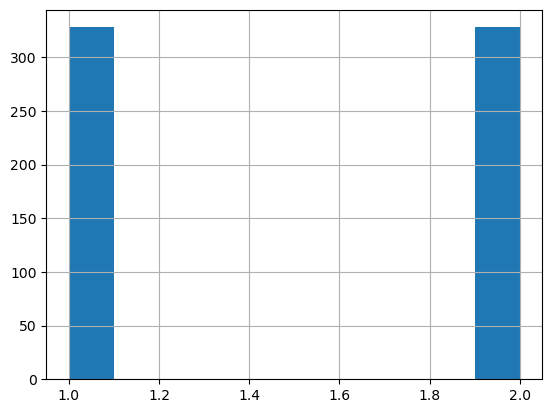

In [146]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.hist()

In [147]:
#RANDOM FOREST MODEL

In [148]:
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6869565217391305

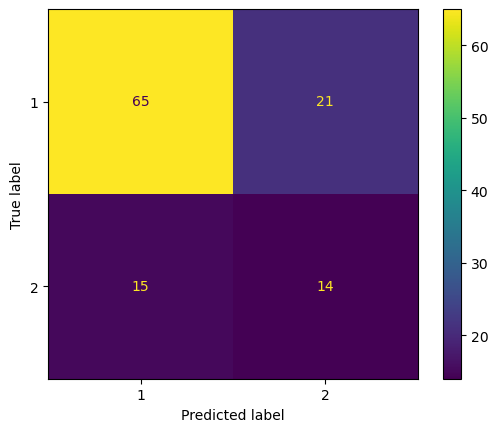

In [149]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

In [150]:
recall_score(y_test, y_pred)

0.7558139534883721

In [151]:
precision_score(y_test, y_pred)

0.8125

In [152]:
rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3,5,7,10],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train_resampled, y_train_resampled)

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.731 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.694 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.711 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.712 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.685 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.716 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=300;, score=0.731 total time=   0.2s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=300;, score=0.708 total time=   0.2s
[CV 3/3] END max_depth=3, max_fea

In [153]:
# Best hyperparameters are {'max_depth': 10, 'max_features': 30, 'min_samples_leaf': 1, 'n_estimators': 200}
# Best score is: 0.7896471311074804

In [192]:
rf_optimized = model_grid.best_estimator_
y_pred = rf_optimized.predict(X_test)
accuracy_score(y_test, y_pred)
recall_score(y_test, y_pred)
precision_score(y_test, y_pred)

0.8356164383561644

In [194]:
#logistic regression model

In [196]:
# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [198]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='saga', tol=0.1))

In [200]:
# Create a parameter grid
param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2']
}

In [202]:
grid_search = GridSearchCV(pipe, param_grid, cv=3)

In [204]:
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           solver='saga',
                                                           tol=0.1))]),
             param_grid={'logisticregression__C': [0.1, 1, 10, 100],
                         'logisticregression__penalty': ['l1', 'l2']})

In [206]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'logisticregression__C': 100, 'logisticregression__penalty': 'l2'}
Best Score: 0.9666666666666667


In [211]:
#KNN model
iris = load_iris()
X, y = iris.data, iris.target

In [213]:
knn = KNeighborsClassifier(n_neighbors=3)

In [215]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [217]:
predictions = knn.predict(X_test)

In [219]:
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6521739130434783


In [221]:
def prepare_dataframe(test_score_dict,train_score_dict,key,columns):
    df_test = pd.DataFrame(test_score_dict,index = ["Test Score"])
    df_train = pd.DataFrame(train_score_dict,index = ["Train Score"])
    np_result = np.concatenate([df_test,df_train],axis = 0)
    df_result = pd.DataFrame(np_result)

    df_result.index = ["Test Score","Train Score"]
    df_result.columns = [key + str(c) for c in columns]  
    return df_result

In [223]:
#Implementing KNN algoritms with different parameters
def knn_model(n_neighbors = 5,weights = 'uniform',algorithm = 'auto',p = 2):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors,
                               weights = weights,
                               algorithm = algorithm,
                               p = p
                              )
    
    accuracies_train = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 3)
    train_score = np.mean(accuracies_train)
    
    knn.fit(X_train,y_train)
    test_score = knn.score(X_test,y_test)
   
    return train_score, test_score

In [173]:
#KNN algorithm implementation with default parameters
train_score,test_score = knn_model()
result_train["Default-Train"] = train_score
result_test["Default-Test"] = test_score
print("Mean accuracy of train set:",train_score)
print("Mean accuracy of test set:", test_score) 

Mean accuracy of train set: 0.6035050970534842
Mean accuracy of test set: 0.6695652173913044


In [235]:
grid = {'n_neighbors':np.arange(1,235),
        'p':np.arange(1,3),
        'weights':['uniform','distance'],
        'algorithm':['auto','ball_tree','kd_tree','brute']
       }
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,grid,cv=3)
knn_cv.fit(X_train,y_train)

print("Hyperparameters:",knn_cv.best_params_)
print("Train Score:",knn_cv.best_score_)
result_train["GridSearch-Best-Train"] = knn_cv.best_score_

Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 163, 'p': 2, 'weights': 'distance'}
Train Score: 0.7155145929339478


***Random forest Best score is: 0.7896471311074804 & Best hyperparameters are {'max_depth': 10, 'max_features': 30, 'min_samples_leaf': 1, 'n_estimators': 200}***

***KNNTrain Score: 0.7155145929339478 & Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 163, 'p': 2, 'weights': 'distance'}***

***Logistic Regression Best Score: 0.9533333333333333 & Best Parameters: {'logisticregression__C': 10, 'logisticregression__penalty': 'l1'}***

The Logistic Regression model performs better with a significantly higher score. Therefore, Logistic Regression is the better model to choose based on these results.